In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import flatten


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier



from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV

from imblearn.combine import SMOTETomek


from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc



import warnings
warnings.filterwarnings('ignore')

In [92]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
#reading csv file and getting the first 5 columns
df=pd.read_csv("/Users/anand/Downloads/Micro Credit Project/Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [29]:
#checking number of rows and columns
df.shape

(209593, 37)

In [30]:
#checking null values -->no null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [31]:
#checking datatypes
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [32]:
#dropping columns that are unnecessary
df.drop(['Unnamed: 0','msisdn','pdate','pcircle'],axis=1,inplace=True)
df.shape

(209593, 33)

In [33]:
#description to get outliers,skewness,mean max
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [34]:
##positive values in each features
(df >= 0).all()

label                    True
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30             True
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback30                True
payback90                True
dtype: boo

In [37]:
#dropping these features,but will import later
df.drop(['rental30','rental90'],axis=1,inplace=True)

In [38]:
## Removing negative values in each features
index=[]
for cols in df.columns.values:
    Index_1=df[df[f'{cols}'] < 0].index.values
    Index_2=Index_1.tolist()
    index.append(Index_2)
index_fl=flatten(index)
set(index_fl)
len(index_fl)

9922

In [39]:
df.drop(index_fl,inplace=True)

In [40]:
#checking positive values again
(df >= 0).all(0)

label                   True
aon                     True
daily_decr30            True
daily_decr90            True
last_rech_date_ma       True
last_rech_date_da       True
last_rech_amt_ma        True
cnt_ma_rech30           True
fr_ma_rech30            True
sumamnt_ma_rech30       True
medianamnt_ma_rech30    True
medianmarechprebal30    True
cnt_ma_rech90           True
fr_ma_rech90            True
sumamnt_ma_rech90       True
medianamnt_ma_rech90    True
medianmarechprebal90    True
cnt_da_rech30           True
fr_da_rech30            True
cnt_da_rech90           True
fr_da_rech90            True
cnt_loans30             True
amnt_loans30            True
maxamnt_loans30         True
medianamnt_loans30      True
cnt_loans90             True
amnt_loans90            True
maxamnt_loans90         True
medianamnt_loans90      True
payback30               True
payback90               True
dtype: bool

In [42]:
#importing the data again to get features rental90,rental30 and pdate 
df_new=pd.read_csv("/Users/anand/Downloads/Micro Credit Project/Data file.csv",parse_dates=['pdate'],index_col=None)
df_new

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [43]:
df['rental30']=df_new['rental30']
df['rental90']=df_new['rental90']
df['pdate']=df_new['pdate']

In [44]:
df.head()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,pdate
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,...,0.0,2.0,12,6,0.0,29.000000,29.000000,220.13,260.13,2016-07-20
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,...,0.0,1.0,12,12,0.0,0.000000,0.000000,3691.26,3691.26,2016-08-10
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,...,0.0,1.0,6,6,0.0,0.000000,0.000000,900.13,900.13,2016-08-19
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,159.42,159.42,2016-06-06
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,...,0.0,7.0,42,6,0.0,2.333333,2.333333,1098.90,1098.90,2016-06-22


In [ ]:
#Analysis

In [45]:
df['label'].value_counts() #imbalanced set

1    179392
0     23727
Name: label, dtype: int64

In [47]:
#label percentage in dataset
print('Percentage',df.label.value_counts(normalize=True))


Percentage 1    0.883187
0    0.116813
Name: label, dtype: float64


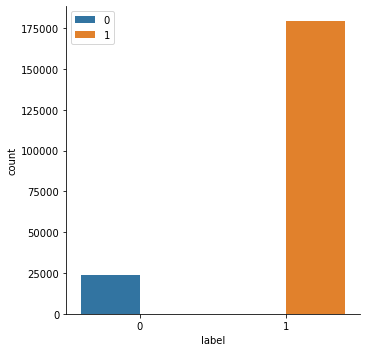

In [48]:
#count of each class in target variable
%matplotlib inline
sns.catplot(x='label',data=df,kind='count',hue='label')
plt.legend()

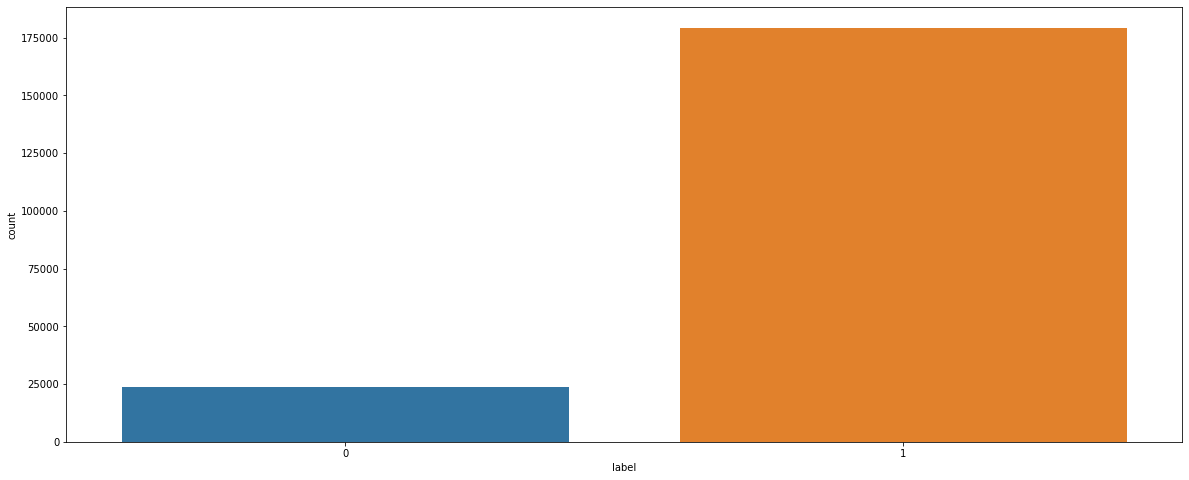

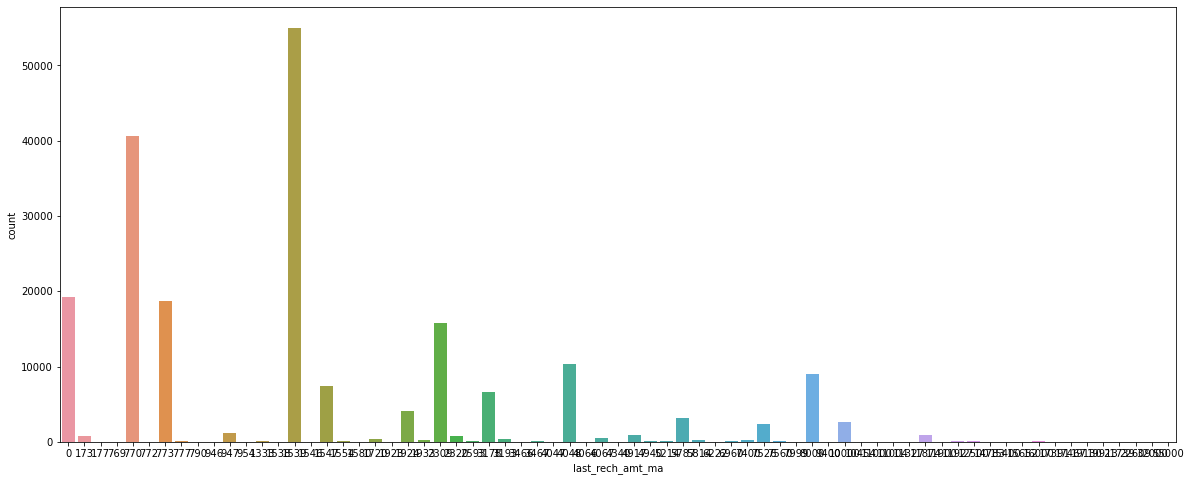

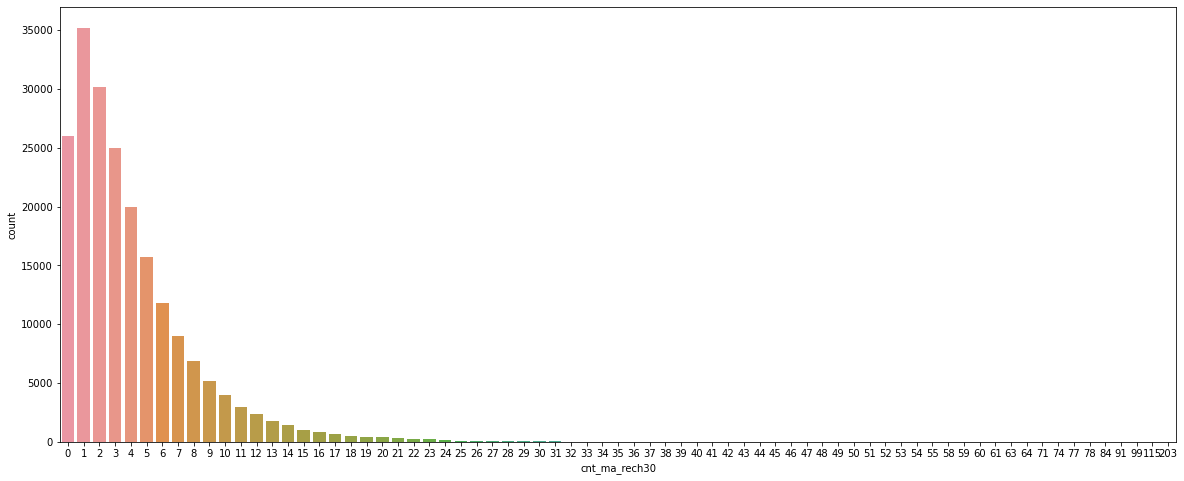

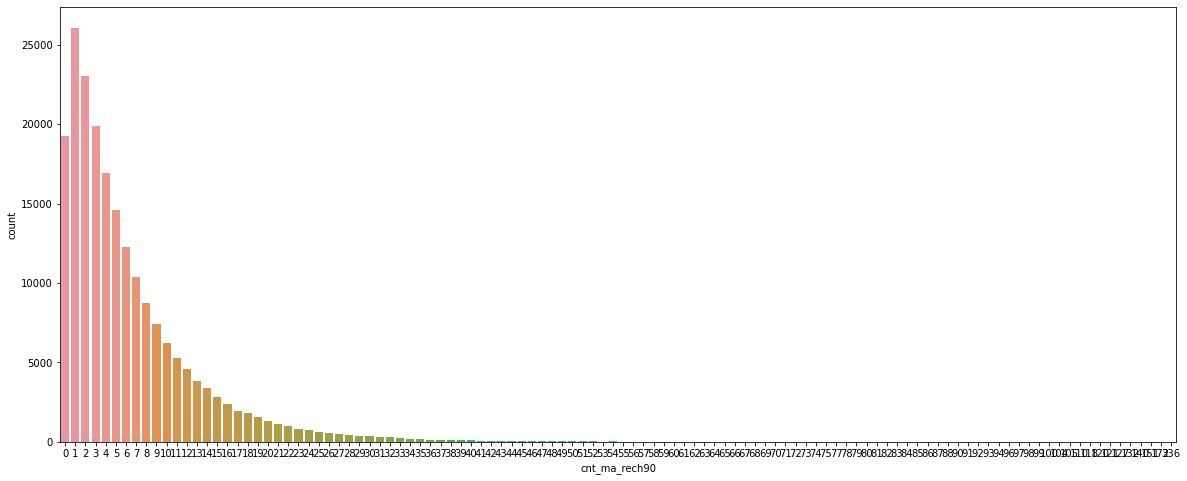

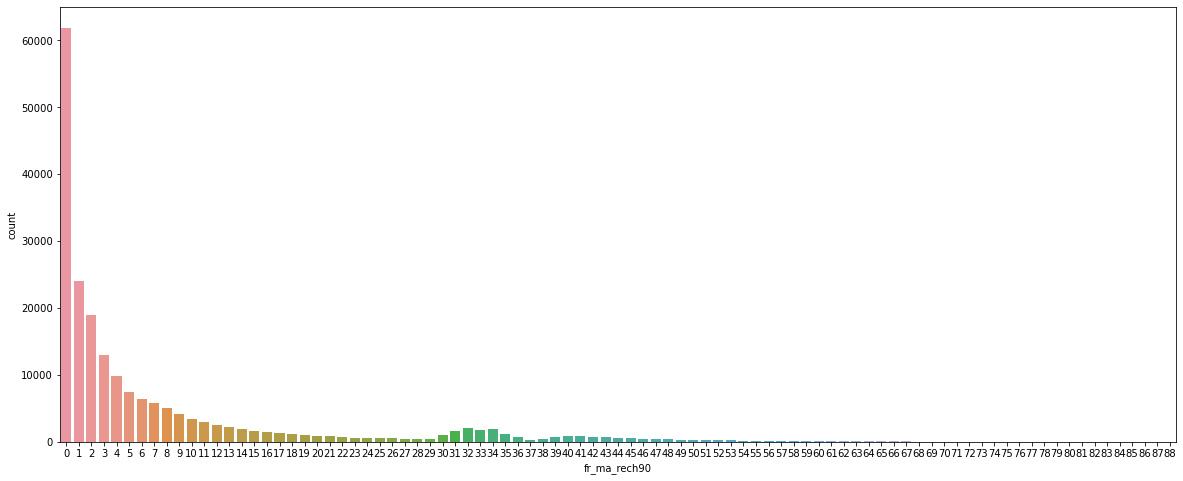

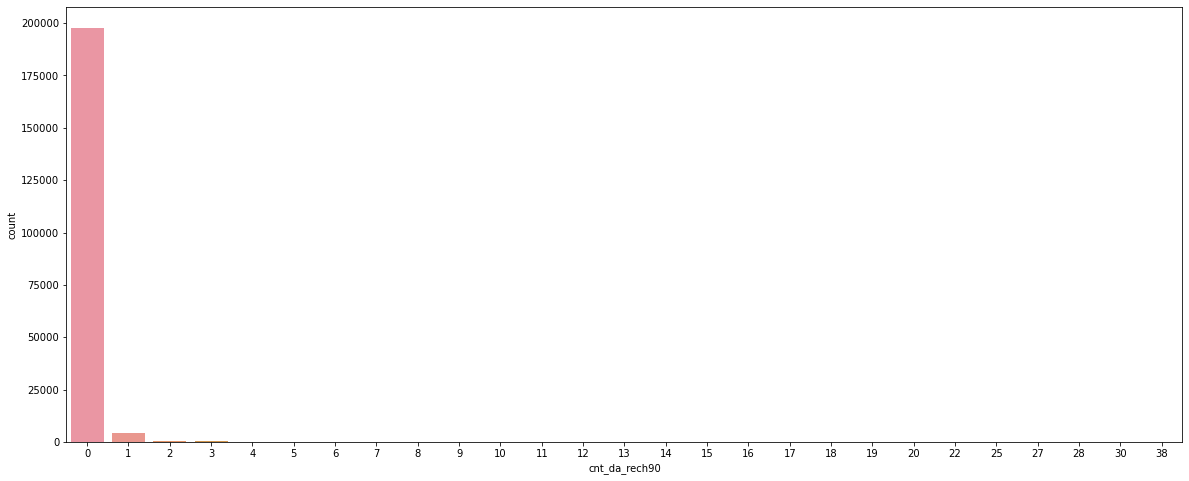

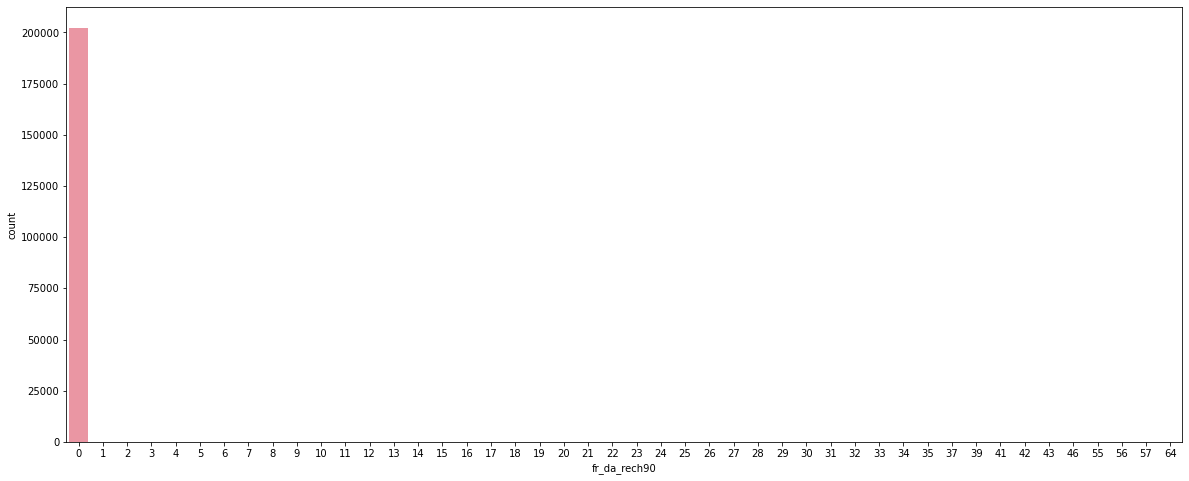

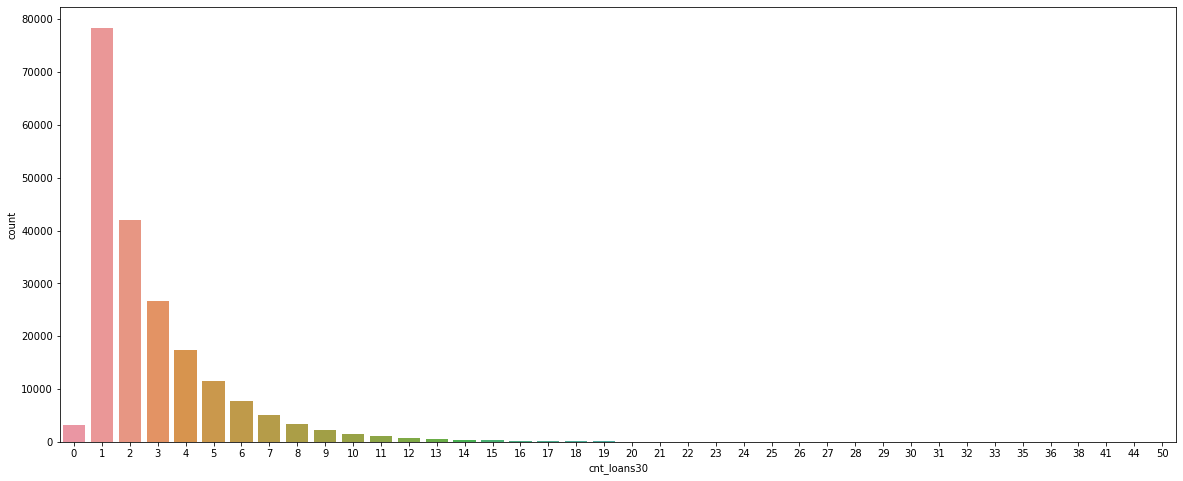

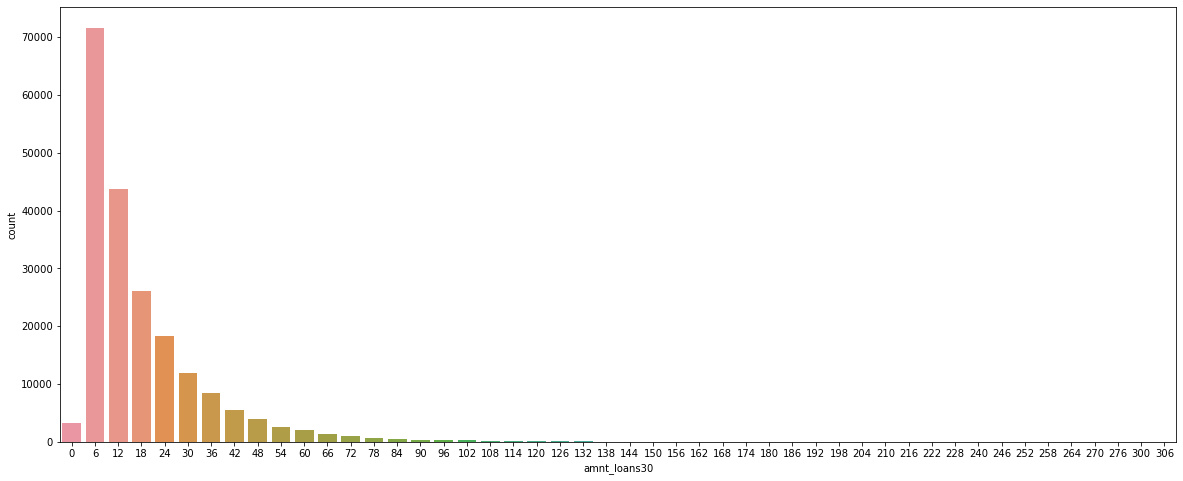

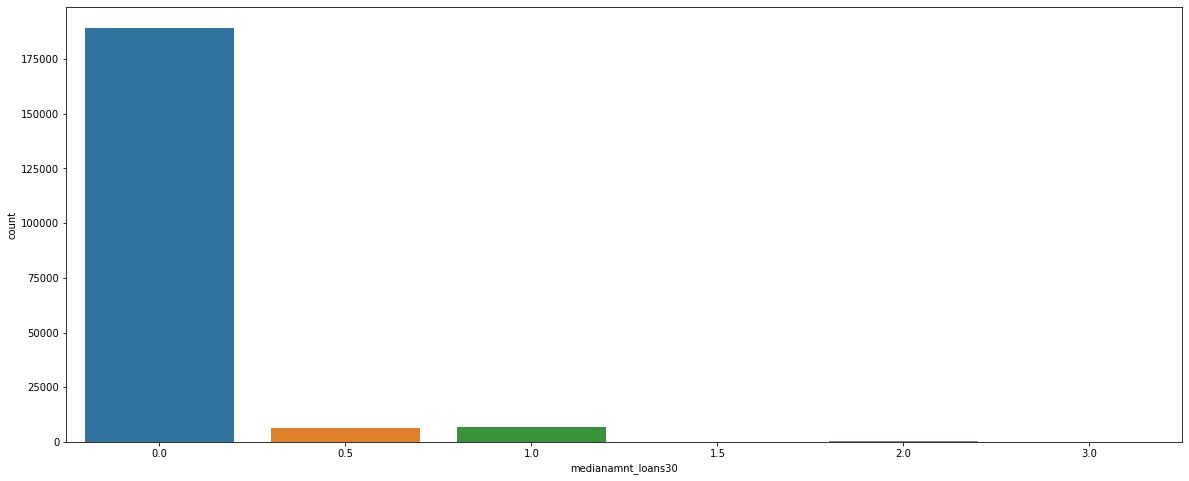

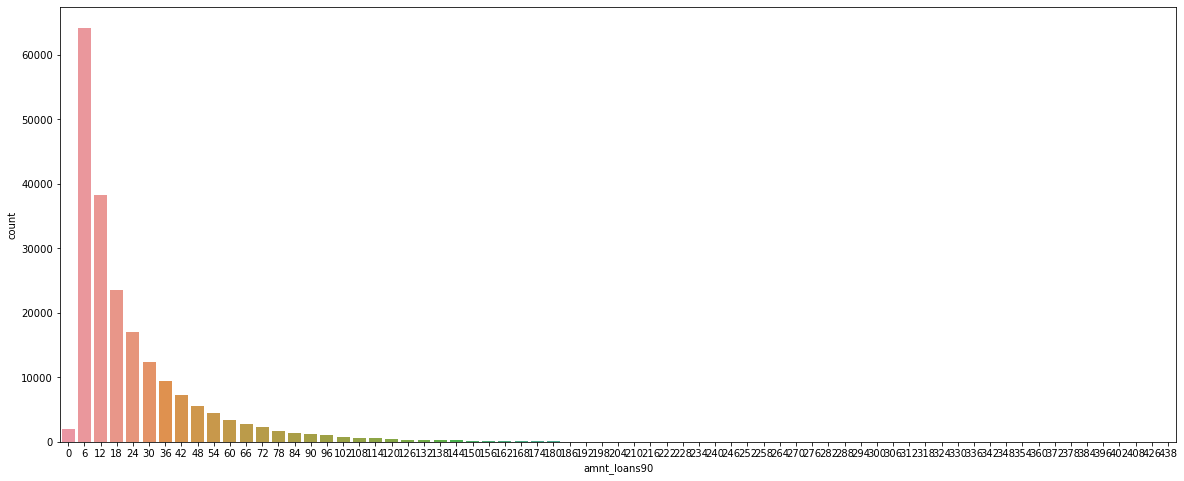

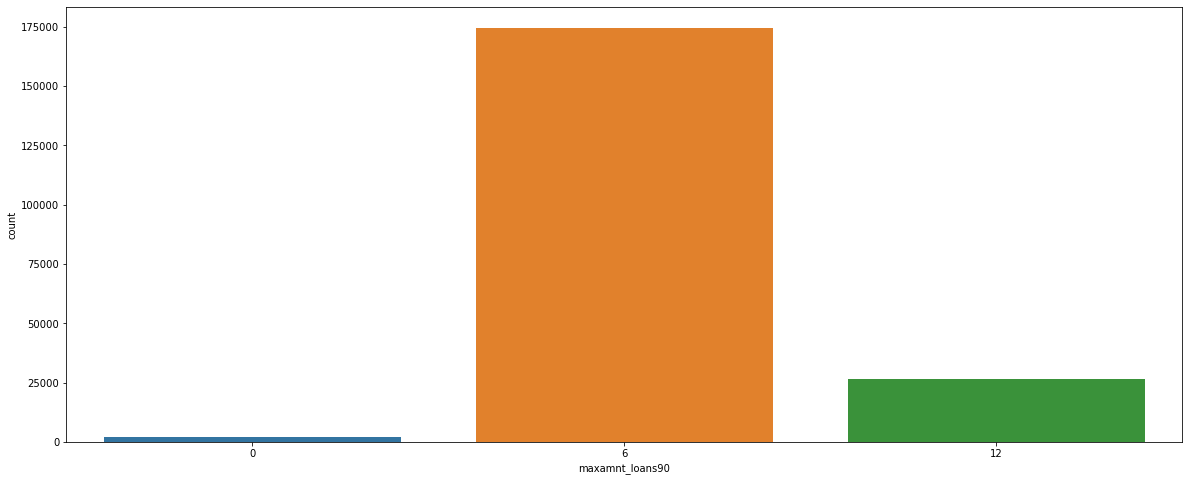

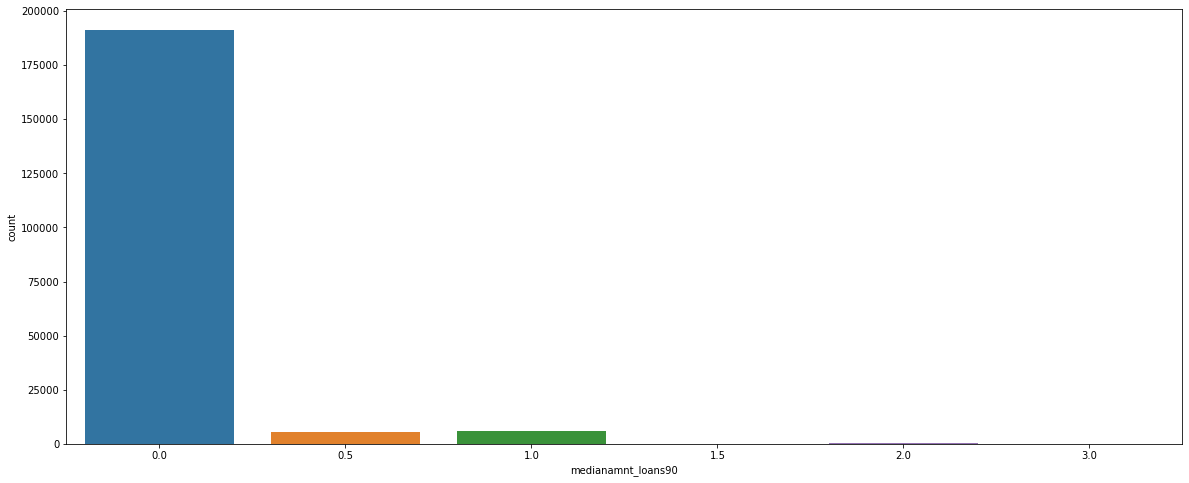

In [50]:
## countplot of list of features 
list_of_col=['label', 'last_rech_amt_ma', 'cnt_ma_rech30','cnt_ma_rech90', 'fr_ma_rech90',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30',
      'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', ]

for i in list_of_col:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df)
    plt.show()

label                      AxesSubplot(0.125,0.826831;0.133621x0.053169)
aon                     AxesSubplot(0.285345,0.826831;0.133621x0.053169)
daily_decr30             AxesSubplot(0.44569,0.826831;0.133621x0.053169)
daily_decr90            AxesSubplot(0.606034,0.826831;0.133621x0.053169)
last_rech_date_ma       AxesSubplot(0.766379,0.826831;0.133621x0.053169)
last_rech_date_da          AxesSubplot(0.125,0.763028;0.133621x0.053169)
last_rech_amt_ma        AxesSubplot(0.285345,0.763028;0.133621x0.053169)
cnt_ma_rech30            AxesSubplot(0.44569,0.763028;0.133621x0.053169)
fr_ma_rech30            AxesSubplot(0.606034,0.763028;0.133621x0.053169)
sumamnt_ma_rech30       AxesSubplot(0.766379,0.763028;0.133621x0.053169)
medianamnt_ma_rech30       AxesSubplot(0.125,0.699225;0.133621x0.053169)
medianmarechprebal30    AxesSubplot(0.285345,0.699225;0.133621x0.053169)
cnt_ma_rech90            AxesSubplot(0.44569,0.699225;0.133621x0.053169)
fr_ma_rech90            AxesSubplot(0.606034,0.6992

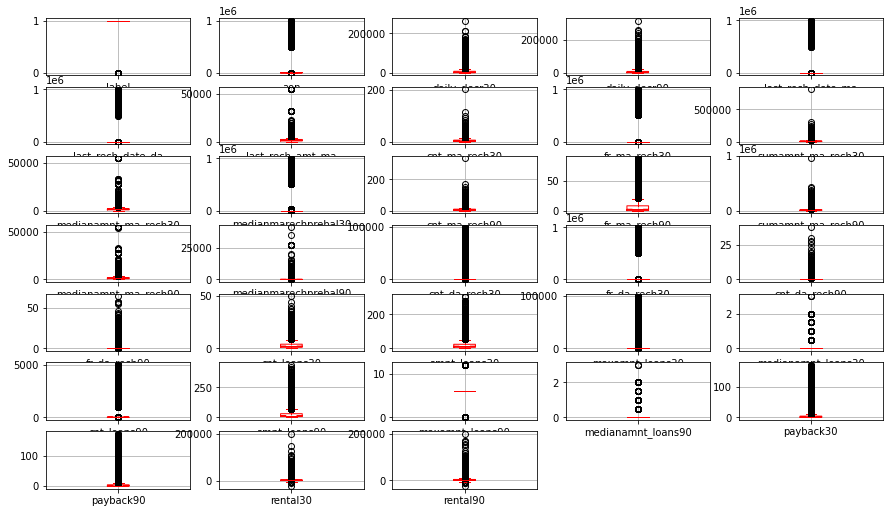

In [52]:
#Plotting the boxplot in order to check few statistical values and outliers

df.drop('pdate',axis=1).plot(kind='box', subplots=True, layout=(12,5),figsize=(15,15), grid=True, notch=True, color='red',legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccd2685820>,
      dtype=object)

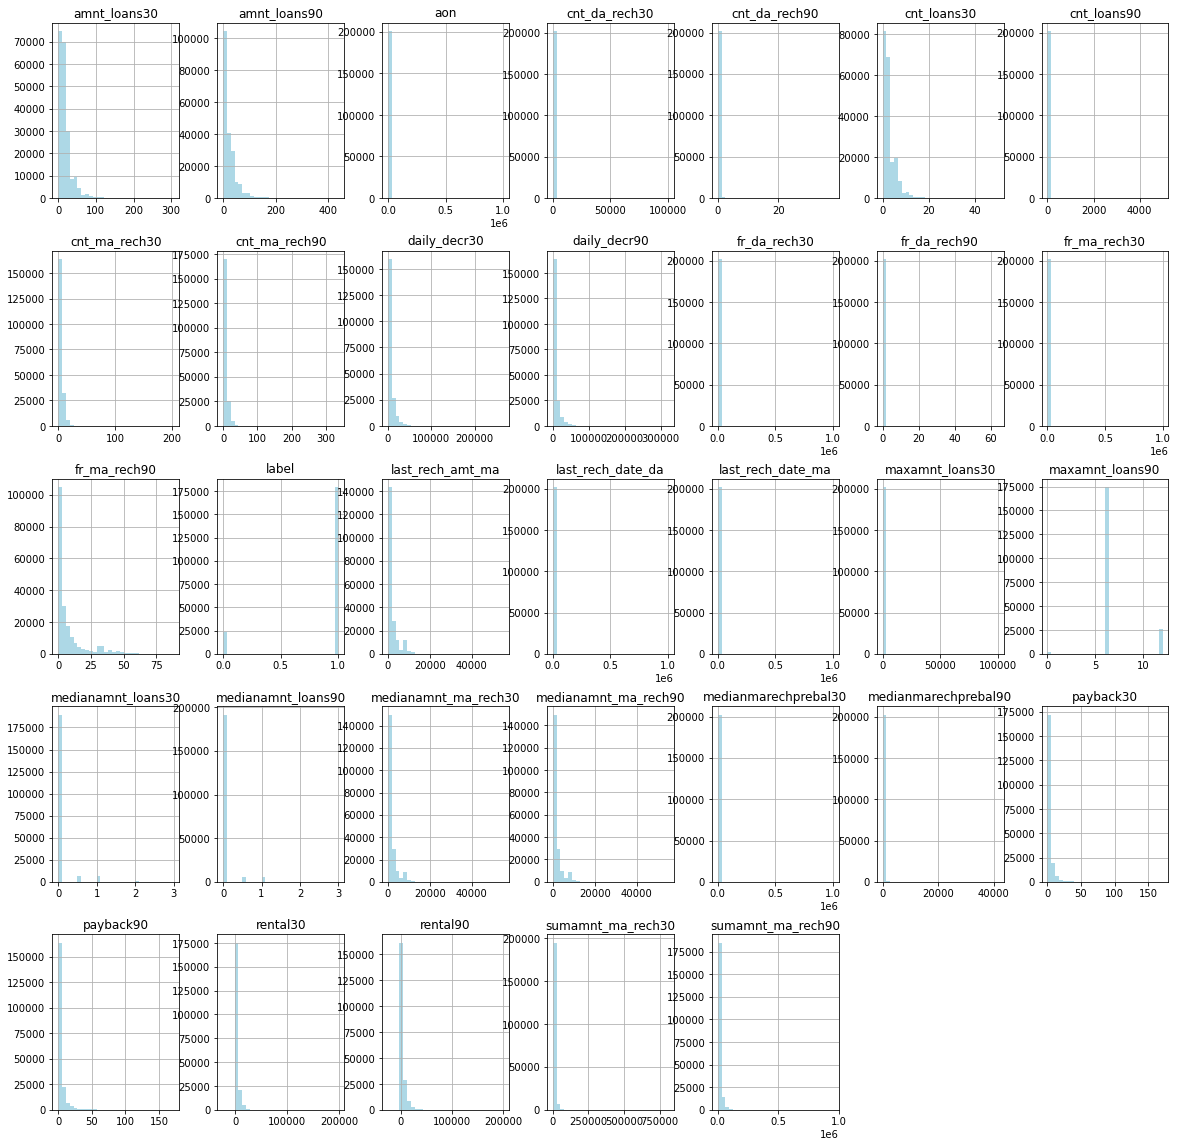

In [53]:
#Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='lightblue')

In [ ]:

#Bivarient Analysis

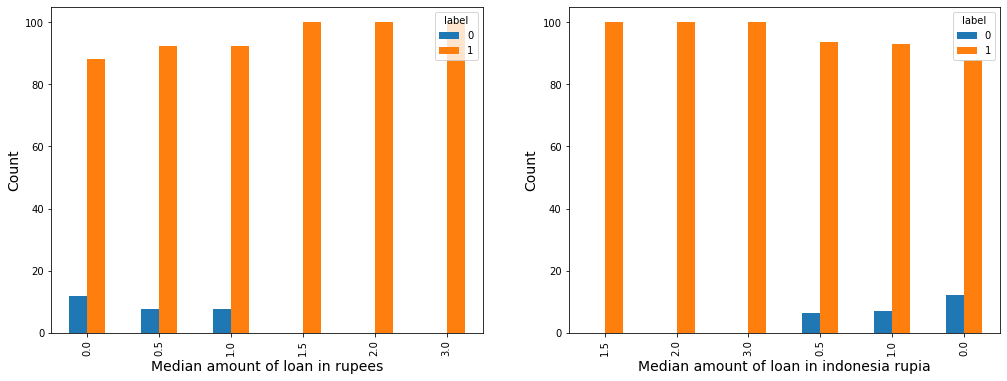

In [55]:
table_medianamnt_loans90  = pd.crosstab(df['medianamnt_loans90'], df['label'])
table_medianamnt_loans30 = pd.crosstab(df['medianamnt_loans30'], df['label'])
table_maxamnt_loans90  = pd.crosstab(df['maxamnt_loans90'], df['label'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_medianamnt_loans90.div(table_medianamnt_loans90.sum(axis= 1),axis = 0)*100).sort_values(by= 1).plot(kind = 'bar',ax=ax);
plt.xlabel("Median amount of loan in rupees",fontsize = 14);
plt.ylabel('Count',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_medianamnt_loans30.div(table_medianamnt_loans30.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Median amount of loan in indonesia rupia",fontsize = 14);
plt.ylabel('Count',fontsize = 14);

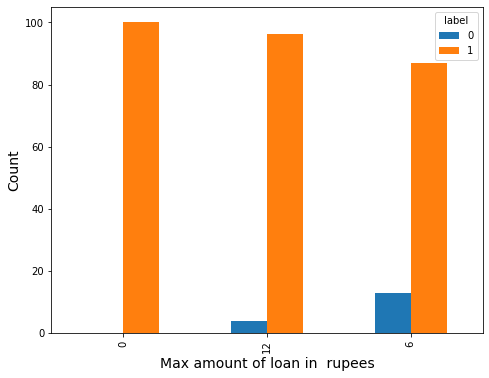

In [56]:
fig = plt.figure(figsize = (17,7))

ax = fig.add_subplot(1,2,2)
(table_maxamnt_loans90.div(table_maxamnt_loans90.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Max amount of loan in  rupees",fontsize = 14);
plt.ylabel('Count',fontsize = 14);

In [57]:
#checking correlation
df.corr()['label'].sort_values()

fr_da_rech90           -0.006770
medianmarechprebal30   -0.003660
aon                    -0.003257
fr_da_rech30           -0.000628
fr_ma_rech30            0.000269
cnt_da_rech90           0.000457
maxamnt_loans30         0.000591
last_rech_date_da       0.000777
last_rech_date_ma       0.003291
cnt_da_rech30           0.003886
cnt_loans90             0.005160
medianamnt_loans90      0.033279
medianmarechprebal90    0.035454
medianamnt_loans30      0.041934
payback30               0.042385
payback90               0.042864
rental30                0.053048
rental90                0.070185
fr_ma_rech90            0.073161
maxamnt_loans90         0.080027
medianamnt_ma_rech90    0.109699
last_rech_amt_ma        0.120954
medianamnt_ma_rech30    0.130066
daily_decr90            0.160075
daily_decr30            0.161804
cnt_loans30             0.188395
amnt_loans30            0.189479
amnt_loans90            0.192480
sumamnt_ma_rech30       0.193586
sumamnt_ma_rech90       0.197374
cnt_ma_rec

In [59]:
#removing features and outliers
print(f"Number of columns before deleting: {df.shape[1]}")
del_cols = ["daily_decr30","fr_ma_rech30","payback30","rental30","medianamnt_loans30","amnt_loans30",
                "fr_da_rech30","cnt_da_rech30","sumamnt_ma_rech30","fr_ma_rech30","cnt_ma_rech30","pdate"]
df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 34
Number of columns after deleting: 23


In [62]:
df_clean = df[df['last_rech_date_ma'] < 250]  
df_clean = df_clean[df_clean['last_rech_date_da'] <= 115]
df_clean = df_clean[df_clean['aon'] < 2500]
df_clean = df_clean[df_clean['cnt_loans90'] <= 71]
df_clean = df_clean[df_clean['maxamnt_loans30'] <= 12]

In [63]:
#checking data loss
df_clean.shape

(197074, 23)

In [77]:
!pip install currencyconverter

     |████████████████████████████████| 522 kB 2.3 MB/s eta 0:00:01


In [64]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()
li=['sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90']
df_clean['sumamnt_ma_rech90']=df_clean['sumamnt_ma_rech90'].apply(lambda x: c.convert(x, 'INR', 'IDR'))
df_clean['medianmarechprebal90']=df_clean['medianmarechprebal90'].apply(lambda x: c.convert(x, 'INR', 'IDR'))
df_clean['medianamnt_ma_rech90']=df_clean['medianamnt_ma_rech90'].apply(lambda x: c.convert(x, 'INR', 'IDR'))

ModuleNotFoundError: No module named 'currency_converter'

In [65]:
#checking skewness
df_clean.skew()

label                   -2.385382
aon                      0.955740
daily_decr90             4.223756
last_rech_date_ma        3.558246
last_rech_date_da        9.541342
last_rech_amt_ma         3.778608
medianamnt_ma_rech30     3.457059
medianmarechprebal30    14.887157
cnt_ma_rech90            3.415783
fr_ma_rech90             2.280832
sumamnt_ma_rech90        4.921478
medianamnt_ma_rech90     3.722286
medianmarechprebal90    44.948803
cnt_da_rech90           27.026340
fr_da_rech90            28.852493
cnt_loans30              2.675302
maxamnt_loans30          1.397167
cnt_loans90              2.968752
amnt_loans90             3.115186
maxamnt_loans90          1.644180
medianamnt_loans90       4.925344
payback90                6.858323
rental90                 4.416034
dtype: float64

In [66]:
#removing skewness
for i in df_clean.drop(['label','rental90'],axis=1).columns:
    if df_clean.skew().loc[i]>0.55:
        df_clean[i]=np.log1p(df_clean[i])
    elif df_clean.skew().loc[i]<-0.5:
        df_clean[i]=np.square(df_clean[i])
df_clean.skew()

label                   -2.385382
aon                     -0.439930
daily_decr90            -0.449093
last_rech_date_ma        0.500062
last_rech_date_da        6.231370
last_rech_amt_ma        -2.255726
medianamnt_ma_rech30    -1.924193
medianmarechprebal30     0.273415
cnt_ma_rech90           -0.053401
fr_ma_rech90             0.503199
sumamnt_ma_rech90       -2.090668
medianamnt_ma_rech90    -2.304321
medianmarechprebal90    -0.571072
cnt_da_rech90            8.400197
fr_da_rech90            17.846944
cnt_loans30              0.688376
maxamnt_loans30         -2.919760
cnt_loans90              0.730149
amnt_loans90             0.205065
maxamnt_loans90         -2.382667
medianamnt_loans90       4.351535
payback90                0.734191
rental90                 4.416034
dtype: float64

label                   -2.385382
aon                     -0.439930
daily_decr90            -0.449093
last_rech_date_ma        0.500062
last_rech_date_da        6.231370
last_rech_amt_ma        -2.255726
medianamnt_ma_rech30    -1.924193
medianmarechprebal30     0.273415
cnt_ma_rech90           -0.053401
fr_ma_rech90             0.503199
sumamnt_ma_rech90       -2.090668
medianamnt_ma_rech90    -2.304321
medianmarechprebal90    -0.571072
cnt_da_rech90            8.400197
fr_da_rech90            17.846944
cnt_loans30              0.688376
maxamnt_loans30         -2.919760
cnt_loans90              0.730149
amnt_loans90             0.205065
maxamnt_loans90         -2.382667
medianamnt_loans90       4.351535
payback90                0.734191
rental90                 4.416034
dtype: float64

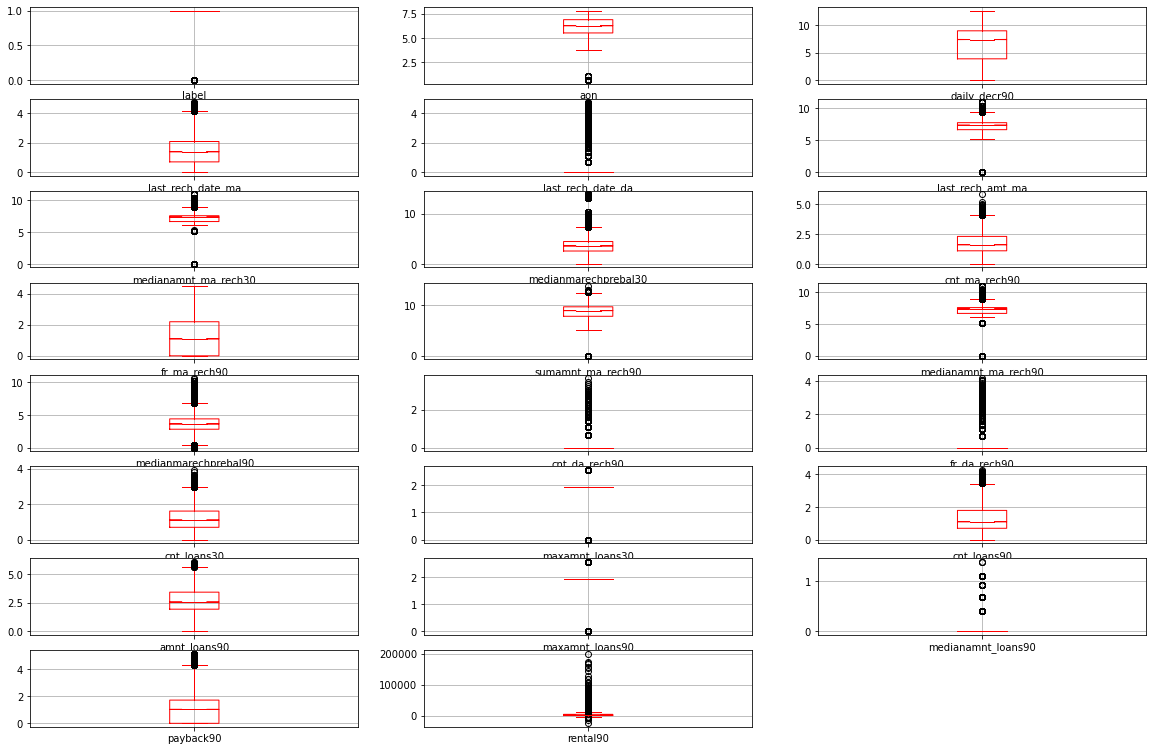

In [67]:
#box plot to check statistical values and outliers
df_clean.plot(kind='box', subplots=True, layout=(12,3),figsize=(20,20), grid=True, notch=True, color='red',legend=True)
df_clean.skew()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccb66fe490>,
      dtype=object)

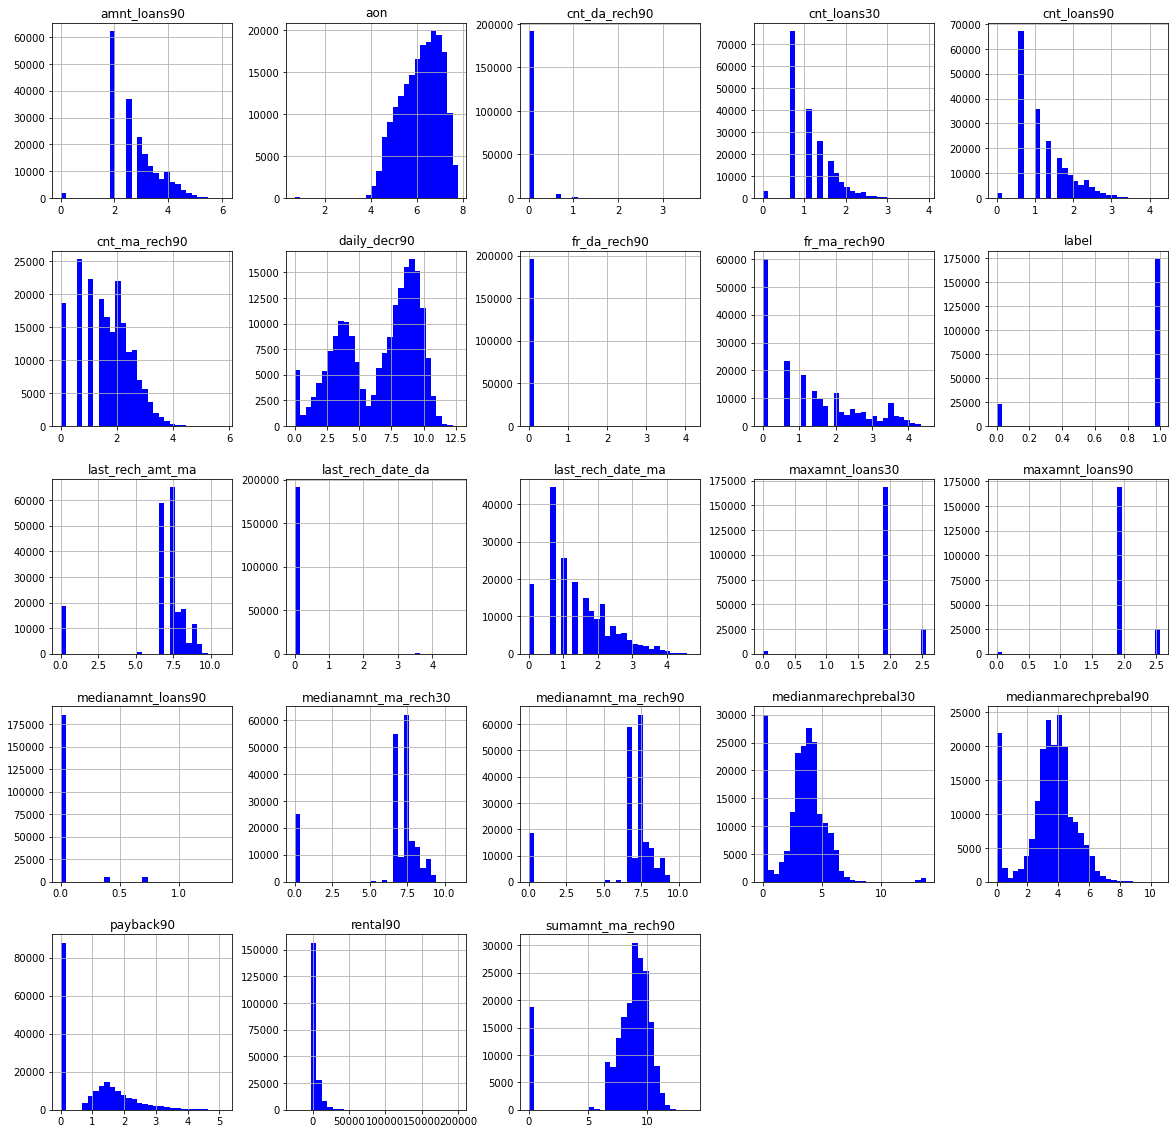

In [69]:
#distribution using histogram
df_clean.hist(figsize=(20,20),grid=True,layout=(5,5),bins=30,color='blue')

(23.5, -0.5)

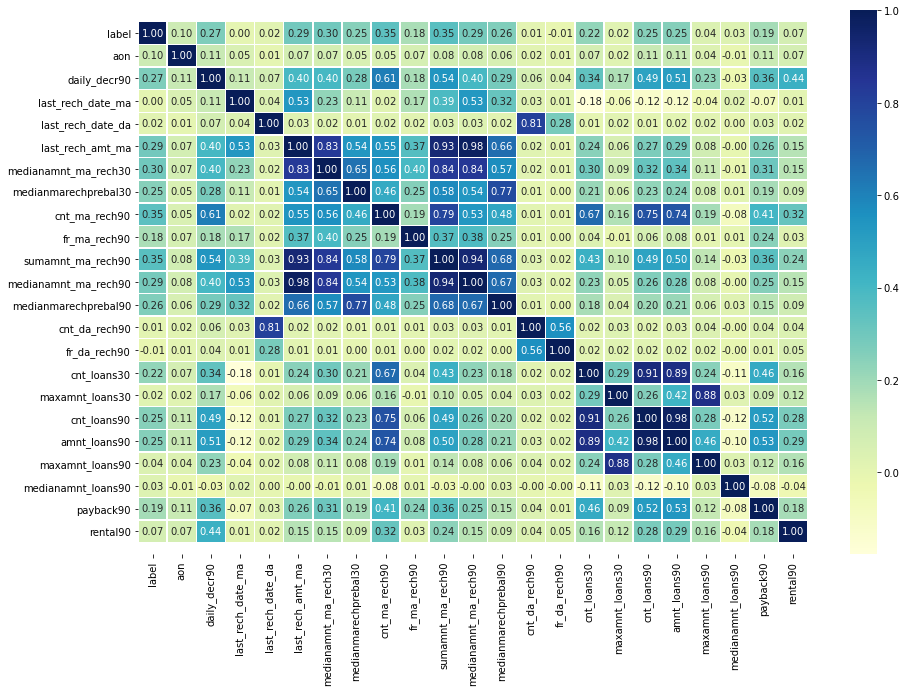

In [70]:
#heatmap 
corr_matrix = df_clean.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [71]:
#removing features

print(f"Number of columns before deleting: {df_clean.shape[1]}")
del_cols = ['medianamnt_ma_rech30','medianmarechprebal30','maxamnt_loans30']
df_clean.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df_clean.shape[1]}")

Number of columns before deleting: 23
Number of columns after deleting: 20


In [ ]:
Defaulters_Category_percent.plot(kind='bar',figsize=(15,5))
plt.title('Average payback time in days over last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Defaulters_Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)

In [72]:
#splitting data into x and y
X = df_clean.drop("label", axis=1)

Y = df_clean["label"]

In [76]:
#balancing dataset
smk = SMOTETomek(random_state=42)
x,y=smk.fit_resample(X,Y)


In [78]:
x.shape, y.shape

((344232, 19), (344232,))

In [79]:
#normalizing
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x1=scale.fit_transform(x)
x=pd.DataFrame(x1,columns=x.columns)
x

,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,-0.531212,0.769798,-0.366836,-0.153404,0.473552,-0.193165,1.610467,0.300242,0.491145,-0.439040,-0.143601,-0.070354,0.142299,-0.056277,-0.007002,-0.201056,-0.225181,2.560739,-0.534816
1,0.593953,1.201735,1.471033,-0.153404,0.924537,-0.644706,-0.909081,0.479867,0.946746,0.655272,-0.143601,-0.070354,-0.722161,-0.766909,-0.007002,2.499320,-0.225181,-0.735222,0.130816
2,0.259516,0.523290,-0.095126,-0.153404,0.473552,-0.644706,-0.909081,0.103076,0.491145,0.700239,-0.143601,-0.070354,-0.722161,-0.766909,-0.807211,-0.201056,-0.225181,-0.735222,-0.410657
3,-0.672482,-0.777998,2.125696,-0.153404,0.308288,-0.644706,-0.909081,-0.035000,0.324190,-0.927534,-0.143601,-0.070354,0.142299,-0.056277,-0.007002,-0.201056,-0.225181,-0.735222,-0.554353
4,0.927835,-0.174810,0.115628,-0.153404,0.611662,1.030290,-0.013588,0.878595,0.707634,0.355636,-0.143601,-0.070354,2.233447,1.662757,1.539345,-0.201056,-0.225181,0.431498,-0.372096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344227,-0.853671,-1.251241,1.747762,-0.153404,0.369343,-0.644706,-0.909081,0.016011,0.385870,0.686214,-0.143601,-0.070354,-0.722161,-0.766909,-0.807211,-0.201056,-0.225181,-0.735222,-0.581828
344228,1.566033,0.303527,-1.404450,-0.153404,-2.026456,-1.416621,-0.909081,-1.985646,-2.034450,-1.617228,-0.143601,-0.070354,-0.722161,-0.766909,-0.807211,-0.201056,-0.225181,-0.735222,-0.585281
344229,0.784098,-1.058137,-0.407023,-0.153404,0.545863,-0.644706,-0.909081,0.163491,0.564197,-0.215745,-0.143601,-0.070354,-0.310312,-0.428347,-0.425972,-0.201056,-0.225181,-0.735222,-0.539878
344230,1.134077,-1.752310,-1.404450,-0.153404,-2.026456,-1.416621,-0.909081,-1.985646,-2.034450,-1.617228,-0.143601,-0.070354,-0.722161,-0.766909,-0.807211,-0.201056,-0.225181,-0.735222,-0.105606


In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [ ]:
models =[]
models.append(("Random Forest",RandomForestClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("Logistic Regression",LogisticRegression()))
models.append(("AdaBoostClassifier",AdaBoostClassifier()))
models.append(("ExtraTreesClassifier",ExtraTreesClassifier()))



#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
logLoss = []

#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
#................Finding log_loss..................    

    log_loss = model.log_loss(y_true = y_test, y_pred = y_pred)
    print('log_loss : ', log_loss)
    logLoss.append(log_loss)
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [ ]:
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore,'log_loss':logLoss}) 
result.style.background_gradient(cmap='YlGnBu')

In [ ]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'Accuracy Score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Val Score', y = 'Model', data = result)
plt.tight_layout()
plt.show()

In [ ]:
#Define a function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    log_loss = metrics.log_loss(y_true, y_preds)

    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print('log_loss : ', log_loss

    return metric_dict

In [ ]:
#Parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5,verbose=1,refit=True,n_jobs=-1)
    clf.fit(x,y)
    print(clf.best_params_)
    print(clf.best_score_)

In [ ]:
#RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [50,100,200,300],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [None, 5, 10],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(rf,parameters,'accuracy')

In [ ]:
rf=RandomForestClassifier(n_estimators=300,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
max_acc_score(rf,x,y)

In [ ]:
#DecisionTreeClassifier
gs_clfD=DecisionTreeClassifier()
parameters={'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],
        'criterion':['gini','entropy'],
         'max_depth': range(1,20,2),
        }
grid_cv(gs_clfD,parameters,'accuracy')

In [ ]:
print("Best parameter:",gs_clfD.best_params_)
print("score:",gs_clfD.best_score_)

In [ ]:
dtc =DecisionTreeClassifier(criterion= 'entropy', max_depth= 15, max_leaf_nodes= 99, min_samples_split= 2)
print("DecisionTreeClassifier accuracy score:",max_acc_score(dtc,x,y))

In [ ]:
#Final Model with Random Forest Classifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 57,test_size=0.20,stratify=y)
clf_rf=RandomForestClassifier(n_estimators=300,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
clf_rf.fit(x_train,y_train)
predrf=clf_rf.predict(x_test)
evaluate_preds(y_test,predrf)

In [ ]:
# Make predictions with probabilities
y_probs = clf_rf.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, predrf):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predrf),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predrf)
#lets printed confusion_matrix
print(confusion_matrix(y_test, predrf))

In [ ]:
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predrf
test

In [ ]:
df1=pd.DataFrame(predrf)
df1.to_csv('Micro_Credit.csv')

In [ ]:
#Feature Importance

In [ ]:
clf_rf.feature_importances_

In [ ]:
def plot_features(columns, importances, n=28):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

In [ ]:
plot_features(x_train.columns, clf_rf.feature_importances_)

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf_rf,'Project_Micro_Credit.pkl')

In [ ]:
rf_from_joblib=joblib.load('Project_Micro_Credit_submission.pkl')
joblib_y_preds = rf_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)